# Week 6 Exercise

# Setup

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import utils

1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?

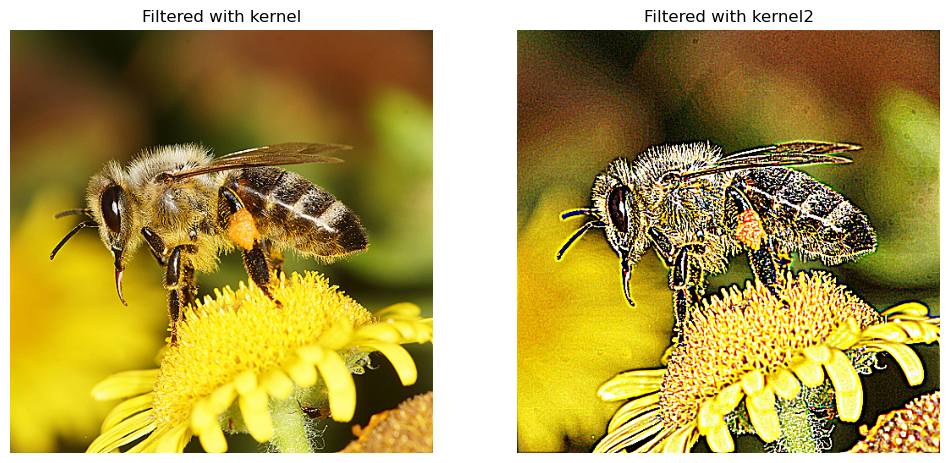

In [4]:
kernel = np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])
kernel2 = np.full((5, 5), -1)
kernel2[2,2]=25

img = cv.imread("image/images/native-bee.png")

# Plot the results
plt.figure(figsize=(12, 6))

dst = cv.filter2D(img, -1,kernel)
# Plot the first filtered image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))  # Convert to RGB for proper display in matplotlib
plt.title('Filtered with kernel')
plt.axis('off')

dst2 = cv.filter2D(img, -1,kernel2)
# Plot the second filtered image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))  # Convert to RGB for proper display in matplotlib
plt.title('Filtered with kernel2')
plt.axis('off')

plt.show()

2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

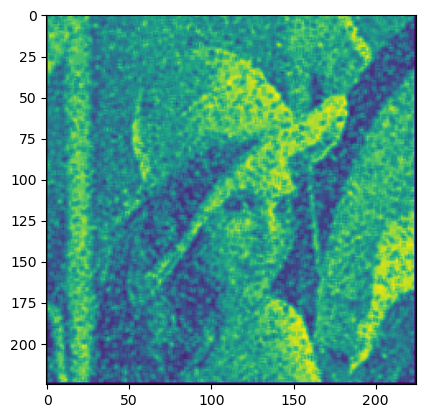

In [11]:
#average filter
img = cv.imread('image/images/noise_lena.jpg',0)
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
plt.imshow(img_new)
plt.show()

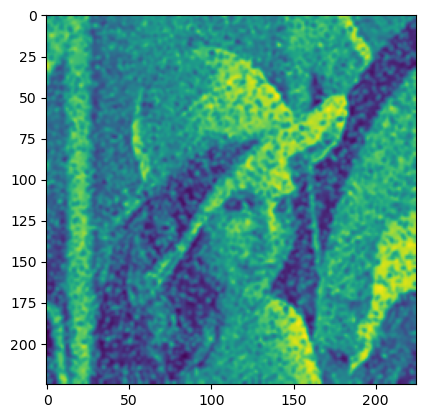

In [12]:
#Gaussian kernel
img_noisy2 = cv.imread('image/images/noise_lena.jpg')
gray = cv.cvtColor(img_noisy2, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(gray,(5,5),0)
plt.imshow(blur)
plt.show()

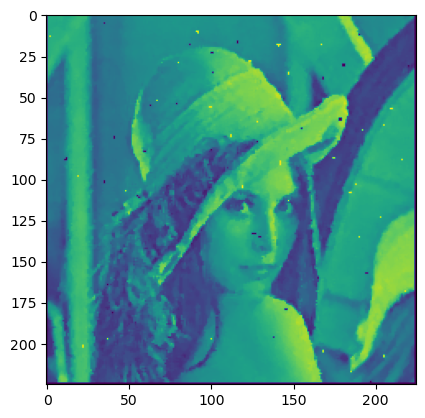

In [13]:
#median filter
img_noisy1 = cv.imread('image/images/noise_lena.jpg',0)
  
# Obtain the number of rows and columns  
# of the image 
m, n = img_noisy1.shape 
   
# Traverse the image. For every 3X3 area,  
# find the median of the pixels and 
# replace the center pixel by the median 
img_new1 = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
plt.imshow(img_new1)
plt.show()

3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

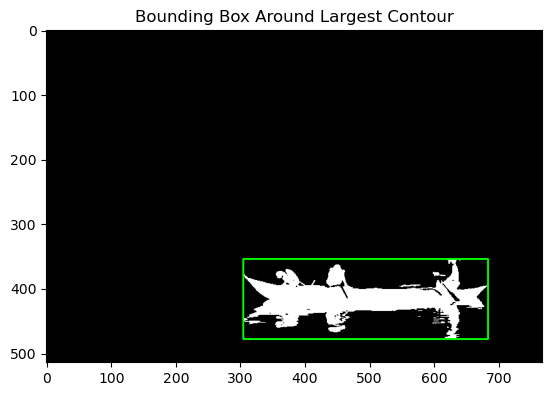

In [14]:
# Load and threshold the image
gray = cv.imread('image/images/boat.jpg', 0)

# Step 2: Apply Otsu's threshold with binary inversion
ret, th2 = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

# Step 3: Find contours
contours, _ = cv.findContours(th2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contour_largest = max(contours, key=cv.contourArea)

x, y, w, h = cv.boundingRect(contour_largest)
img_with_bbox = cv.cvtColor(th2, cv.COLOR_GRAY2BGR)  # Convert grayscale image to BGR for colored rectangle


cv.rectangle(img_with_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle with thickness 2
plt.imshow(img_with_bbox)
plt.title('Bounding Box Around Largest Contour')
plt.show()